# Necessary Imports

In [2]:
!pip install pyibl
import pyibl
from pyibl import Agent
import sys
import random as rd
import matplotlib as plt
import csv
import seaborn as sns
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Function and Agent Declarations

In [4]:
#                                         Reads the CSV file that contains the list of urls, the file will contain
#                                         the url, yes/no checks for spelling, urgency, authentic matching and if prompted to download
def read_csv_file(file):
    data = {}

##                                        Open the CSV file
    with open(file, newline='') as csvfile:

##                                        Create a CSV reader object
        reader = csv.reader(csvfile)

##                                        Loop through each row in the CSV file
        for row in reader:
##                                        Split the row into a tuple
            key = row[0]

            values = (row[1].lower() == 'true', row[2].lower() == 'true', row[3].lower() == 'true')

            data.update({key: values})

    return data


csv_data = read_csv_file('/content/url-list.csv')

print(csv_data)

{'URL': (False, False, False), 'www.g00gle.com': (False, False, False), 'www.disc0rd.comm': (False, False, False), 'https://studentaid.gov/': (True, True, False), 'https://g00gle.com': (False, False, False), 'https://discord.com': (True, True, False), 'hrrps://studentaiid.gov': (False, False, False), 'amazon.com': (True, True, False), 'netflixx.com': (False, False, True), 'https://hulu.com/download': (False, True, True), 'www.getFreeM0neyyyyFalsew.scam': (False, False, True), 'www.askdjvbaur.gov': (False, False, False), 'https://stackoverflow.com/': (True, True, False), 'https://www.hbomax.com/': (False, True, False), 'https://youtube.com': (True, True, False), 'https://wikipedia.org': (False, True, False), 'https://instagram.com': (False, True, False), 'https://wikkipeedia.org': (False, False, False), 'https://github.com': (False, True, False), 'https://reddit.com': (False, True, False), 'https://tiktok.com': (False, True, True), 'www.efkvebwuer.com': (False, False, False), 'www.welvc

In [5]:
#                                         Create the Agent
#                                         Add attributes in relation to precautionary measures that can be taken to prevent being phished
phishing_agent = Agent(["Spelling", "Matches Authentic URL", "Urgency", "Download Prompt"], default_utility=10.0, noise=0.25, decay=0.5)

#                                         Define similarity function

phishing_agent.similarity(["Spelling", "Matches Authentic URL", "Urgency", "Download Prompt"], function=lambda x, y: 1 - abs(x - y))

#                                         Establish agent's choices
choices = ['Open Link', 'Ignore Link']

#                                         Create the reward function
#                                         Agent will be penalized -10 for being 
#                                         phished and be rewarded +10 for avoiding
#                                         being phished
def reward(choice):
    if choice == 'Open Link':#            The agent was phished
        r = -10
    elif choice == 'Ignore Link':#        The agent avoided being phished
        r = 10
    else:
        return 0#                         Should not be reachable
    return r


#                                         Create the function to run the model
def runExperiment(runs, trials, agent):
    data_set = {}

    agent.similarity(["Spelling", "Matches Authentic URL", "Urgency", "Download Prompt"], function=lambda x, y: 1 - abs(x - y))

    for r in range(runs):
        agent.reset(preserve_prepopulated=True)
        for i in range(trials):
            link_choices = []
            link_selected = reward(agent.choose(choices))
            link_choices.append(link_selected)
            # Generate unique key for each trial
            key = f'entry {r} - trial {i}'
            data_set.update({key: link_choices})
            agent.respond(link_selected)

    if r == runs - 1:
        agent.instances()

    return data_set


runExperiment(10, 2, phishing_agent)


+----------+-----------------------+---------+-----------------+---------+---------+-------------+
| Spelling | Matches Authentic URL | Urgency | Download Prompt | outcome | created | occurrences |
+----------+-----------------------+---------+-----------------+---------+---------+-------------+
|    I     |           g           |    n    |        o        |    10   |    1    |     [1]     |
|    O     |           p           |    e    |        n        |   -10   |    2    |     [2]     |
+----------+-----------------------+---------+-----------------+---------+---------+-------------+


{'entry 0 - trial 0': [-10],
 'entry 0 - trial 1': [10],
 'entry 1 - trial 0': [10],
 'entry 1 - trial 1': [-10],
 'entry 2 - trial 0': [10],
 'entry 2 - trial 1': [-10],
 'entry 3 - trial 0': [10],
 'entry 3 - trial 1': [-10],
 'entry 4 - trial 0': [10],
 'entry 4 - trial 1': [10],
 'entry 5 - trial 0': [-10],
 'entry 5 - trial 1': [10],
 'entry 6 - trial 0': [10],
 'entry 6 - trial 1': [10],
 'entry 7 - trial 0': [-10],
 'entry 7 - trial 1': [10],
 'entry 8 - trial 0': [-10],
 'entry 8 - trial 1': [10],
 'entry 9 - trial 0': [10],
 'entry 9 - trial 1': [-10]}

+----------+-----------------------+---------+-----------------+---------+---------+--------------------------------------------------+
| Spelling | Matches Authentic URL | Urgency | Download Prompt | outcome | created |                   occurrences                    |
+----------+-----------------------+---------+-----------------+---------+---------+--------------------------------------------------+
|    O     |           p           |    e    |        n        |   -10   |    1    |                       [1]                        |
|    I     |           g           |    n    |        o        |    10   |    2    | [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] |
+----------+-----------------------+---------+-----------------+---------+---------+--------------------------------------------------+


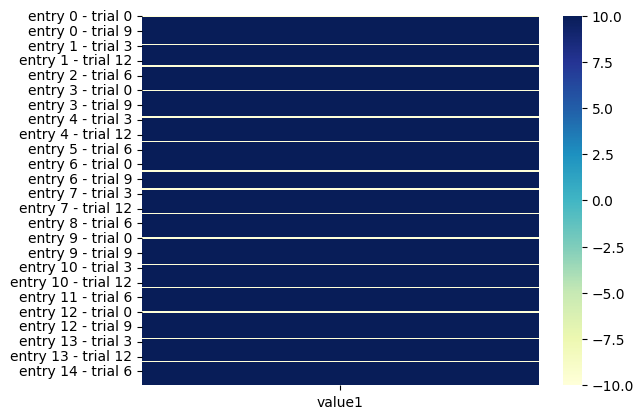

In [8]:
def plot_results(data_set):
    if data_set is None:
        return "Data set was empty"
# Convert dictionary to pandas DataFrame
    data_df = pd.DataFrame.from_dict(data_set, orient='index', columns=['value1'])

# Create heatmap plot using Seaborn
    sns.heatmap(data_df, cmap="YlGnBu")


plot_results(runExperiment(15,15,phishing_agent))

+----------+-----------------------+---------+-----------------+---------+---------+--------------------------------------------------+
| Spelling | Matches Authentic URL | Urgency | Download Prompt | outcome | created |                   occurrences                    |
+----------+-----------------------+---------+-----------------+---------+---------+--------------------------------------------------+
|    I     |           g           |    n    |        o        |    10   |    1    | [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] |
|    O     |           p           |    e    |        n        |   -10   |    2    |                       [2]                        |
+----------+-----------------------+---------+-----------------+---------+---------+--------------------------------------------------+


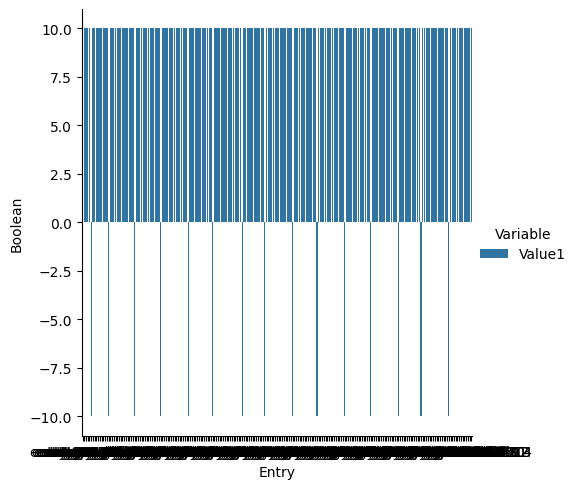

In [11]:
def plot_results2(data_set):
    data_df = pd.DataFrame.from_dict(data_set, orient='index', columns=['Value1'])

    # Reshape the DataFrame to create a tidy dataset for Seaborn
    df = data_df.stack().reset_index()
    df.columns = ['Entry', 'Variable', 'Boolean']

    # Create the bar plot
    sns.catplot(x='Entry', y='Boolean', hue='Variable', data=df, kind='bar')


plot_results2(runExperiment(15,15,phishing_agent))


# Important Links:

> http://pyibl.ddmlab.com/


> https://github.com/DDM-Lab/SpeedyIBL/blob/fef814fab37faad5c8785df39a3954f70cd1b8d1/Codes/pyibl.py


> http://pyibl.ddmlab.com/#id2

> https://www.learndatasci.com/glossary/jaccard-similarity/


